### Mount the local drive to save the works

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

# ***Turicreate ***

In [3]:
#!pip install turicreate
import turicreate

In [4]:
image_train = turicreate.SFrame('/content/MyDrive/MyDrive/SFRAMES/image_train_data/')
image_test = turicreate.SFrame('/content/MyDrive/MyDrive/SFRAMES/image_test_data/')

,SArray
0,
1,
2,
3,
4,

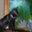
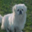
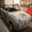
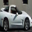
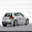

In [5]:
image_train['image'][10:15].explore()

# **Summary Statistics - Sketch**

In [6]:
sketch = turicreate.Sketch(image_train['label'])

In [7]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [8]:
def get_images_id(query_result):
  return image_train.filter_by(query_result['reference_label'], 'id')

In [9]:
#Four image categories, dog, cat, automobile, and bird.
dog = image_train.filter_by('dog', 'label')


In [10]:
dog.head(5)

id,image,label,deep_features,image_array
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
177,Height: 32 Width: 32,dog,"[0.0, 1.4596567153930664,0.0, 0.4229923486709595, ...","[55.0, 75.0, 42.0, 51.0,76.0, 37.0, 57.0, 83.0, ..."
424,Height: 32 Width: 32,dog,"[0.9423996806144714, 0.0,0.22035276889801025, ...","[60.0, 35.0, 18.0, 63.0,49.0, 38.0, 66.0, 56.0, ..."
462,Height: 32 Width: 32,dog,"[1.4346256256103516, 0.0,0.0, 0.0, 0.0, 0.0, ...","[86.0, 69.0, 75.0, 57.0,41.0, 48.0, 46.0, 35.0, ..."


In [13]:
dog_model = turicreate.nearest_neighbors.create(dog, features=['deep_features'], label='label')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# **Explore Images Dataset**

In [ ]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

In [ ]:
image_test[0:3]['image'].explore()

In [ ]:
image_test[0:3]['label']

In [ ]:
raw_pixel_model.predict(image_test[0:3])

In [ ]:
raw_pixel_model.evaluate(image_test)

In [ ]:
#deep_learning_model = turicreate.load_model('http://s3.amazonaws.com/GraphLab-Datasets/deeplearning/imagenet_model_iter45')
#deep_learning_model = turicreate.load_model("resnet-50")
#deep_learning_model = turicreate.image_classifier.create(image_train, target='label',model='resnet-50')
#deep_learning_model.evaluate(image_test)

In [ ]:
image_train.head()

# **Deep Features Classifier**

In [ ]:
deep_features_model = turicreate.logistic_classifier.create(image_train, features=['deep_features'], target = 'label')

In [ ]:
deep_features_model.predict(image_test[0:3])

In [ ]:
deep_features_model.evaluate(image_test)

# **Deep Features - Image Retrieval - kNN Model**

In [ ]:
knn_model = turicreate.nearest_neighbors.create(image_train, features=['deep_features'], label='id')

In [ ]:
cat = image_train[18:19]
cat

In [ ]:
cat['image'].explore()

In [ ]:
knn_model.query(cat)

In [ ]:
cat_neigbors = get_images_id(knn_model.query(cat))

In [ ]:
cat_neigbors['image'].explore()

# **Lambda for kNN images**

In [ ]:
show_neighbor = lambda i: get_images_id(knn_model.query(image_train[i:i+1]))['image'].explore()

In [ ]:
show_neighbor(26)

In [ ]:
show_neighbor(1222)